# knowing which customer are likely to leave or unsubscribe from your service
in this case we use Bank churn prediction fro many companies this is an important prediction ,bcz acquiring new customers often costs more than retaining existing one

In [1]:
import pandas as pd
import numpy as np

In [2]:
#bcz,,we have not yet installed Tenserflow(keras) so that we are working on kaggle ,,bcz it has cloud ,tenserflow(keras) and all library related to AI are already installed
#after installing it you can replace this path with "D:\DEEP_LEARNING\Customer_churn_prediction\Churn_Modelling.csv"
df=pd.read_csv(r"D:\DEEP_LEARNING\A_N_N\2_Customer_churn_prediction_ANN\Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
#bcz now our goal is to observe how tenserfloe(keras ) works so no need to deep dive into problem statement

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
#no missing values

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
df.duplicated().sum()
#check,,whether duplicate rows are present in dataset

0

In [9]:
df['Exited'].value_counts()
#   7963 customers are not exited bank ,  2037 customers are exited the company
#imbalance classification,,,,problem
#but we are learning Tenserflow working,,so not doing any feature engg and EDA

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
# as u see 'RowNumber	CustomerId	Surname' is not important to check that particular customer leave bank or not
#so u can drop them

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [12]:
#we want numerical value,,Geography,Gender are catogarical var,so convert them in to Number by 
#ONE_HOT_ENCODING

In [13]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()
#drop_first=True-->Geography has 3 class France,Germany,Spain so,Geography_France,Geography_Germany,
#Geography_Spain is created and Geography_France droped bcz ,if Geography_Germany,Geography_Spain
#are False then Geography should be France...so drop 1st dummie feature
#same for Gender,,,Gender_female is droped,,bcz if Gender_male is False then Gender is female


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [14]:
# bcz all data is in numerical form so we are ready for build our DL model
#but,,wait----->feature scaling is required broo..

In [15]:
#bcz,some values are in more digit and some are in one digit,,some are in 3 digit ...etc
#therfore while training the model ,,values are not converged correctly and fastly soo,,feature scaling is must in NN
#so while creating Neural Network u must scale the feature
#Note-->feature scaling done on INDEPENDENT NUMERICAL FEATURES(so if any independent feature 
#is categorical then convert it to numeric by one-hot-encoding)

In [16]:
X=df.drop(columns=['Exited'])#df.ilkoc[:,:-1]
y=df['Exited']#df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
X

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.88                  0                0   
1                  1        112542.58                  0                1   
2                  0        113931.57                  0                0   
3                  0         93826.63                  0                0   
4                  1         79084.10                  0                1   
...              ...              ...                ...              ...   
9995               0         96270.64                  0                0   
9996               1        101699.77                  0                0   
9997               1         42085.58                  0                0   
9998               0         92888.52                  1                0   
9999               0         38190.78                  0                0   

      Gender_Male  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            0  
9998            1  
9999            0  

[10000 rows x 11 columns]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
#feature sccaling is succefull

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#there are 2 type of models we can build in keras ,,,ie;Sequential and non-sequential

In [23]:
model1=Sequential()
#1 input layer(11 input),1 Hidden layer(3 nodes(perceptron/neuron) in that layer),
#1 output layer(1 node/perceptron/neurn-->bcz binary classification problem is there,we need only 1 node in output layer)
#if multiclass classification problem is there then u can give N no of node for N class in output layer and softmax as activation function in output layer
model1.add(Dense(3,activation='relu',input_dim=11))#hidden layer is created with 3 node and 11 ip fields for each node is created
model1.add(Dense(1,activation='sigmoid'))#output layer is created with 1 node/perceptron
#11*3 + 3*1 + 4 (bias ,,1 for each node)==>40 trainable para ie;which has to be calculated during training of NN

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
#now compile the model,,while compiling we give which loss function,which optimizer used for gradient and desent used while compiling processs

In [26]:
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])#log loss -->binary_crossentropy
#displays accuracy at each epochs wjile training,,see below after loss ,accuracy is displayed

In [27]:
#train the model
History=model1.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)#epochs=10 ,how many times NN model(ANN/MLP)should glance data
#(ie;1 forward and 1 backeard propogation is 1 cycle,,and bcz budefaultly stochastic gd used,,so for each row 1 forward and 1 backward propogatin(1 cycle )is carried out)..after finishing all 10k rows 1epoch completed...
#1 epoch ->1 iteration over entire dataset,,,for batch ,minibatch gd it diff
#validation_split=0.2 ie;in X_train data 80% data is used for training and 20% is for testing,,,
#NOTE__>this testing is done while training only and produce validation loss and validation accuracy

#8000 rows for training and 2000 rows for testing/validation purpose
#automatically choosen batch size=40 by keras-->
#8000/40=>200 batches are formed or we can say 200 times w and b are updated in 1 epochs
#or we can say 200 times w and b are updated per epoch
#each batch contains 40 rows,,,such a 200 batches are formed
#by seeing 40 rows 200 times w,b are updated

#that means keras using bydefaulty "minibatch GD"

Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.5742 - accuracy: 0.7972 - val_loss: 0.5340 - val_accuracy: 0.7975
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7972 - val_loss: 0.5017 - val_accuracy: 0.7975
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7972 - val_loss: 0.4816 - val_accuracy: 0.7975
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7972 - val_loss: 0.4693 - val_accuracy: 0.7975
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7972 - val_loss: 0.4613 - val_accuracy: 0.7975
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7972 - val_loss: 0.4552 - val_accuracy: 0.7975
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7972 - val_loss: 0.4509 - val_accuracy: 0.7975
Epoch 

In [28]:
#as u see at 10th epochs(round),loss is minimized(ie;error is less..) and accuracy is 81%
#model is trained successfully,,ie;established the relation ship bn data by calculating 
#weight and bias


In [29]:
model1.layers[0].get_weights()
#33 weights and 3 bias values,at the end of training it is calculated..
#which is given as i/p to hiddem layer

[array([[-0.04168704, -0.12038685,  0.4298738 ],
        [-0.4872805 , -0.915747  , -0.38930237],
        [-0.1441397 ,  0.06183594,  0.1780365 ],
        [-0.76325905,  0.39899087, -0.14569627],
        [ 0.3312126 , -0.02360356, -0.06838667],
        [-0.17987205,  0.45256722, -0.1967933 ],
        [-0.11595777,  0.24360338,  0.77283597],
        [-0.19350155, -0.10409573,  0.21783452],
        [-0.26711762, -0.3512032 , -0.30643904],
        [-0.28425214, -0.34562498,  0.44484368],
        [ 0.7045929 ,  0.30878535, -0.24426645]], dtype=float32),
 array([0.26199445, 0.675372  , 0.17432404], dtype=float32)]

In [30]:
model1.layers[1].get_weights()
#3 weights and 1 bias,,,which is given as i/p to output layer

[array([[-0.57432044],
        [-0.72484946],
        [-0.68111664]], dtype=float32),
 array([-0.23485634], dtype=float32)]

In [31]:
#test the model
y_log=model1.predict(X_test_scaled)
y_log
#model1.predict(X_test_scaled)[1]  access 1th index predicted value

63/63 [==============================] - 0s 1ms/step


array([[0.1264574 ],
       [0.10143349],
       [0.19361325],
       ...,
       [0.04832039],
       [0.19371416],
       [0.3441346 ]], dtype=float32)

In [32]:
#NOTE-->output of NN/ANN/MLP os a probability,,so we have to range it
#ie;if probability >= 0.5 then prediction is 1,,else 0

In [33]:
y_pred=np.where(y_log>0.5,1,0)#if y_log (on each element of array) is > 0.5 then1 else 0
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

In [35]:
#79% accuracy of model
#so..appropriately use no of nodes ,activation function,no of hidden layers,epochs while training 
#it can give more accuracy on test data
#but it can lead overfitting also,,,so no of these things used  appropriately..
#mostly,,,relu activation function used bcz,,it gives more accuracy


In [36]:
import matplotlib.pyplot as plt

In [37]:
History

In [38]:
History.history
#at each epochs ,loss ,accuracy,validation loss and accuracy is stroed in history attribute

{'loss': [0.5742342472076416,
  0.5261023044586182,
  0.49385586380958557,
  0.473967045545578,
  0.461693674325943,
  0.4532376825809479,
  0.4472620487213135,
  0.4429346024990082,
  0.4398937523365021,
  0.4375830888748169],
 'accuracy': [0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574],
 'val_loss': [0.5339827537536621,
  0.5017036199569702,
  0.4815782606601715,
  0.46927931904792786,
  0.46126028895378113,
  0.45515111088752747,
  0.4508512020111084,
  0.44769367575645447,
  0.4455501139163971,
  0.4432626962661743],
 'val_accuracy': [0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147]}

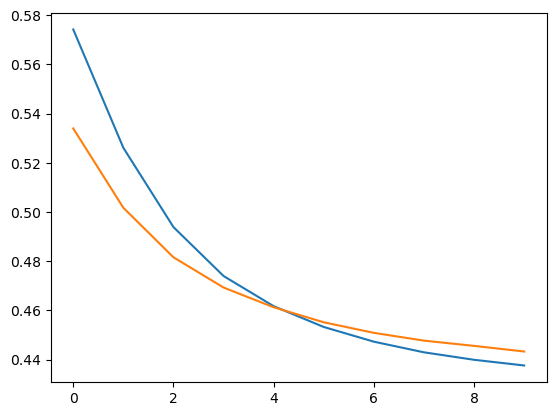

In [39]:
plt.plot(History.history['loss'])#blue
plt.plot(History.history['val_loss'])#orange
#X axis 10 epochs,,at each epochs how training error is varied
#y axis is training error

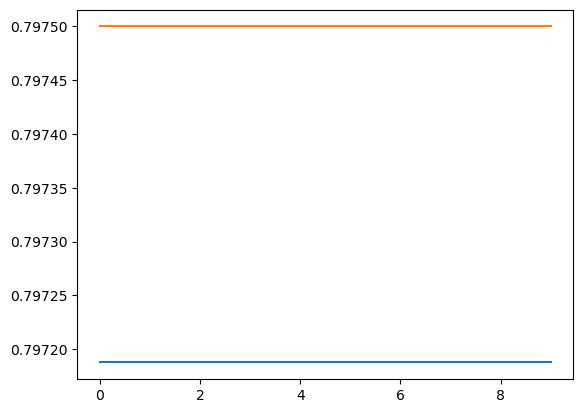

In [40]:
plt.plot(History.history['accuracy'])#blue
plt.plot(History.history['val_accuracy'])#orange
#X axis epochs,,at each round how many accuracy is increased
#y axis,,accuracy